In [8]:
'''
Initial data exploration for general trends. 
'''

'\nInitial data exploration for general trends. \n'

In [9]:
# Exploratory data analysis

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# plotting-- for future use
plt.style.use('default')
sns.set_palette("husl")

# loading
df_clean = pd.read_parquet('../data/processed/cleaned_citibike_data.parquet')

# check for correct load
print(f"Data shape: {df_clean.shape}")
print(df_clean.head())

Data shape: (3158900, 13)
            ride_id  rideable_type              started_at  \
0  A60B1C35CE5E45FD  electric_bike 2025-03-05 09:08:03.136   
1  469B08AA25EDCB64  electric_bike 2025-03-06 07:40:49.163   
2  7C5B0D17ADC24243  electric_bike 2025-03-14 09:20:10.576   
3  5D31A24EC019BA0D  electric_bike 2025-03-10 08:01:32.317   
4  8A65DD5EAB71F1D5  electric_bike 2025-03-14 08:22:50.328   

                 ended_at        start_station_name start_station_id  \
0 2025-03-05 09:15:52.755           E 55 St & 2 Ave          6650.07   
1 2025-03-06 07:48:29.447           E 55 St & 2 Ave          6650.07   
2 2025-03-14 09:27:00.757       Sterling Pl & 5 Ave          4208.01   
3 2025-03-10 08:20:22.409  Lexington Ave & E 111 St          7567.06   
4 2025-03-14 08:36:35.953   W 90 St & Amsterdam Ave          7458.09   

              end_station_name end_station_id  start_lat  start_lng  \
0           E 40 St & Park Ave        6432.11  40.757973 -73.966033   
1        E 43 St & Madison

In [27]:
# overview data

# column names for reference
print("Column names:")
print(df_clean.columns.tolist())

# review. correct data types next if necessary.
print("\nData types:")
print(df_clean.dtypes)

# determine if these are necessary to keep for analytics-- volume, granularity
print("\nMissing values:")
print(df_clean.isnull().sum())

Column names:
['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual', 'date', 'hour', 'day_of_week', 'duration_minutes']

Data types:
ride_id                       object
rideable_type         string[python]
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name    string[python]
start_station_id              object
end_station_name      string[python]
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual         string[python]
date                          object
hour                           int32
day_of_week                   object
duration_minutes             float64
dtype: object

Missing values:
ride_id               0
rideable_type         0
started_at    

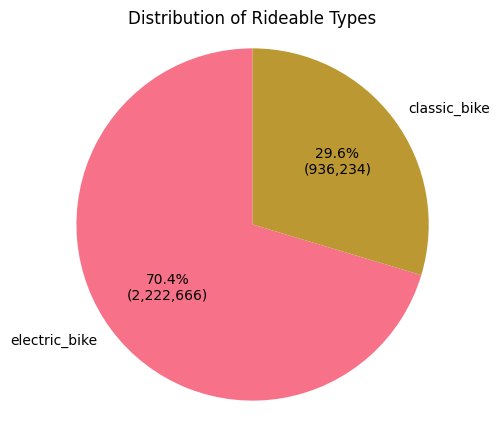

In [17]:
# distribution of ride types with counts
plt.figure(figsize=(5, 5))
rideable_counts = df_clean['rideable_type'].value_counts()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:,})'
    return my_autopct

plt.pie(rideable_counts.values, 
        labels=rideable_counts.index, 
        autopct=make_autopct(rideable_counts.values),
        startangle=90)
plt.title('Distribution of Rideable Types')
plt.axis('equal')
plt.show()

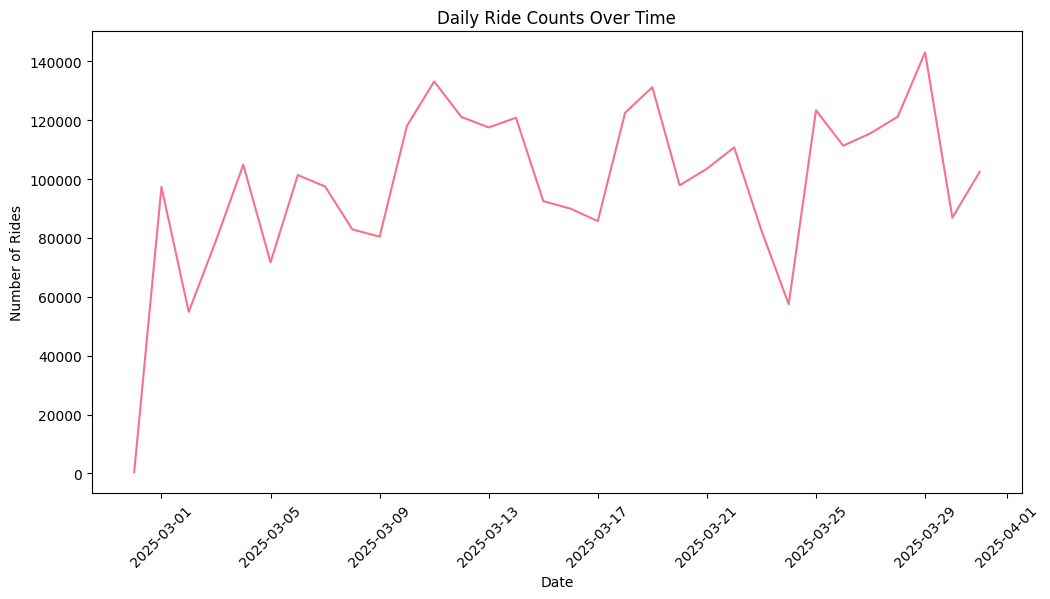

In [18]:
# daily ride counts over time
# date column for grouping
df_clean['date'] = df_clean['started_at'].dt.date
daily_rides = df_clean.groupby('date').size()

# plot specs
plt.figure(figsize=(12, 6))
daily_rides.plot()
plt.title('Daily Ride Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

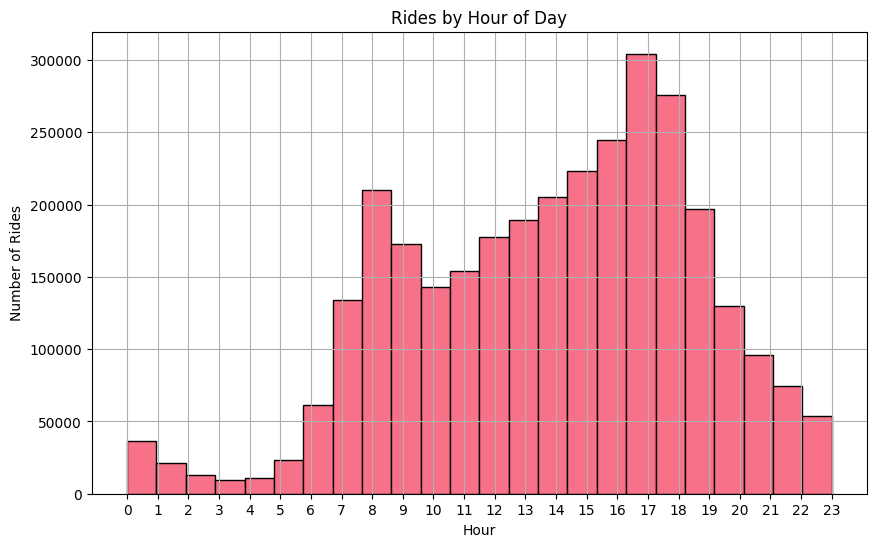

In [19]:
# rides by hour of day

plt.figure(figsize=(10, 6))
df_clean['hour'] = df_clean['started_at'].dt.hour
df_clean['hour'].hist(bins=24, edgecolor='black')
plt.title('Rides by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.show()

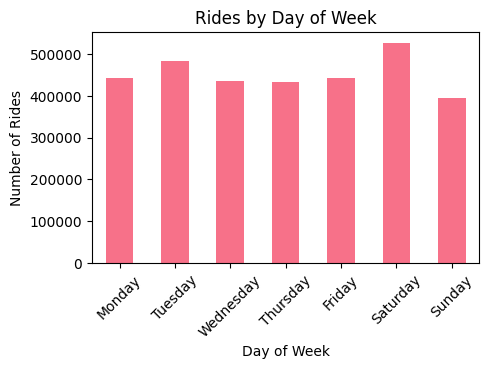

In [20]:
# ries by day of the week
plt.figure(figsize=(5, 3))
df_clean['day_of_week'] = df_clean['started_at'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_clean['day_of_week'].value_counts()[day_order].plot(kind='bar')
plt.title('Rides by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

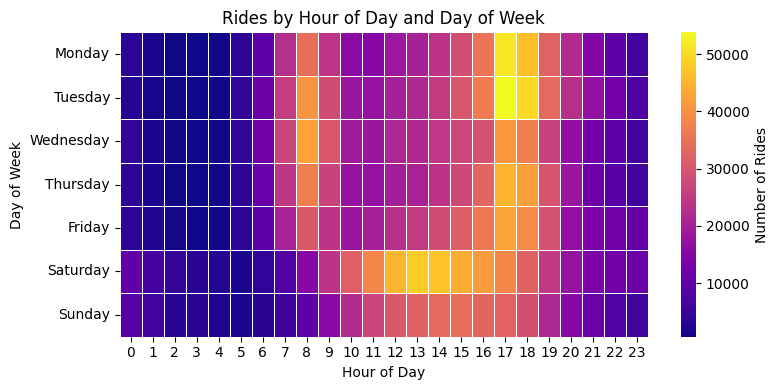

In [21]:
# rides by hours of the day and day of the week 
# create hour and day of week columns
df_clean['hour'] = df_clean['started_at'].dt.hour
df_clean['day_of_week'] = df_clean['started_at'].dt.day_name()

# create pivot table for heatmap
hourly_daily = df_clean.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

# reorder days to start with Monday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_daily = hourly_daily.reindex(day_order)

# create the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(hourly_daily, 
            cmap='plasma',  # or 'viridis', 'plasma', 'Blues', 'Reds', 'colorblind'
            annot=False,
            fmt='d',
            cbar_kws={'label': 'Number of Rides'},
            linewidths=0.5)

plt.title('Rides by Hour of Day and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

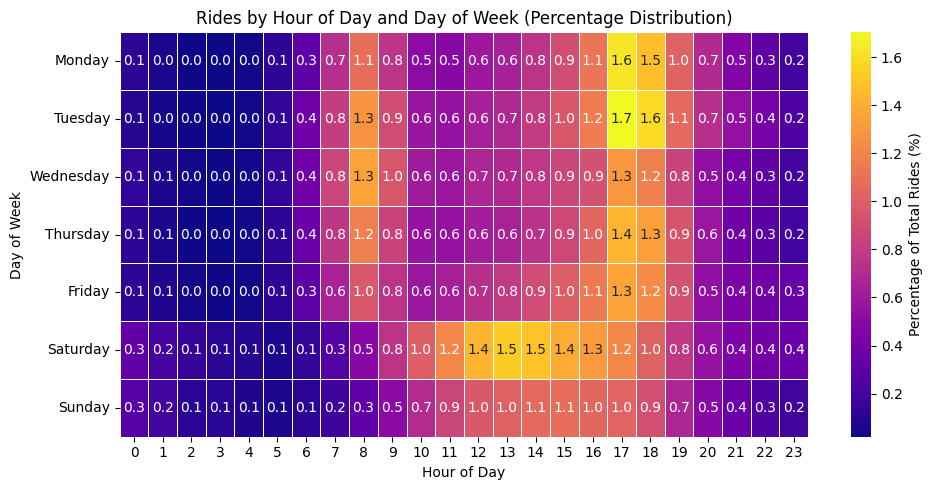

In [22]:
# heatmap with percentages

# Create hour and day of week columns
df_clean['hour'] = df_clean['started_at'].dt.hour
df_clean['day_of_week'] = df_clean['started_at'].dt.day_name()

# Create pivot table for heatmap
hourly_daily = df_clean.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

# Convert to percentages
hourly_daily_pct = (hourly_daily / hourly_daily.sum().sum()) * 100

# Reorder days to start with Monday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_daily_pct = hourly_daily_pct.reindex(day_order)

# Create the heatmap with percentages
plt.figure(figsize=(10, 5))
sns.heatmap(hourly_daily_pct, 
            cmap='plasma',
            annot=True, #annot=False
            fmt='.1f',  # Show 1 decimal place
            cbar_kws={'label': 'Percentage of Total Rides (%)'},
            linewidths=0.5)

plt.title('Rides by Hour of Day and Day of Week (Percentage Distribution)')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

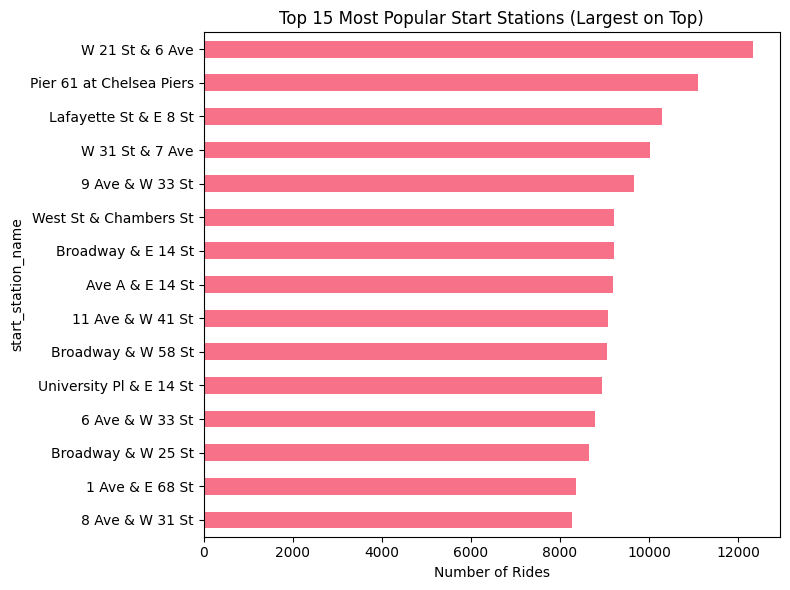

In [23]:
# top 15 start stations 
plt.figure(figsize=(8, 6))
top_start_stations = df_clean['start_station_name'].value_counts().head(15)
top_start_stations.sort_values().plot(kind='barh')  # Added sort_values()
plt.title('Top 15 Most Popular Start Stations (Largest on Top)')
plt.xlabel('Number of Rides')
plt.tight_layout()
plt.show()

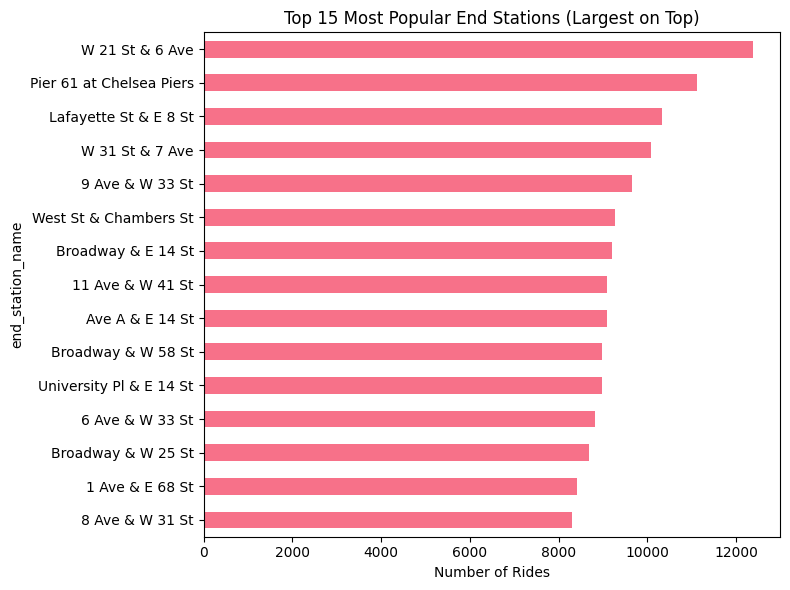

In [24]:
# top 15 start stations 
plt.figure(figsize=(8, 6))
top_start_stations = df_clean['end_station_name'].value_counts().head(15)
top_start_stations.sort_values().plot(kind='barh')  # Added sort_values()
plt.title('Top 15 Most Popular End Stations (Largest on Top)')
plt.xlabel('Number of Rides')
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

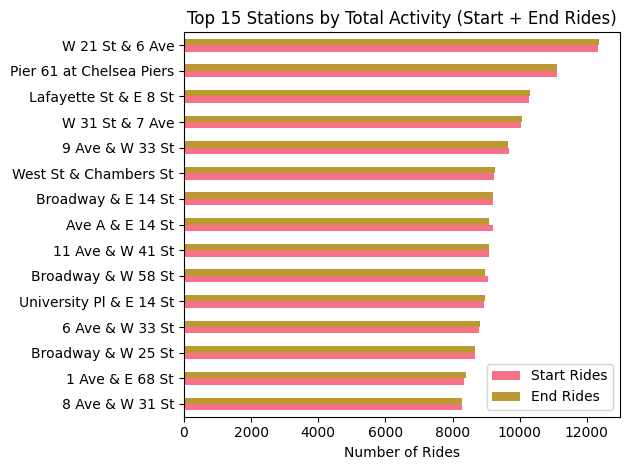

In [25]:
# top 15 stations by total activity (start + end combined)
# Get all station counts
start_counts = df_clean['start_station_name'].value_counts()
end_counts = df_clean['end_station_name'].value_counts()

# Get all unique stations
all_stations = set(start_counts.index) | set(end_counts.index)

# Create combined dataframe with all stations
combined_data = pd.DataFrame({
    'Start_Rides': [start_counts.get(station, 0) for station in all_stations],
    'End_Rides': [end_counts.get(station, 0) for station in all_stations]
}, index=list(all_stations))

# Calculate total activity and get top 15
combined_data['Total'] = combined_data['Start_Rides'] + combined_data['End_Rides']
top_15_overall = combined_data.nlargest(15, 'Total').sort_values('Total')

# Plot
plt.figure(figsize=(12, 10))
top_15_overall[['Start_Rides', 'End_Rides']].plot(kind='barh', stacked=False)
plt.title('Top 15 Stations by Total Activity (Start + End Rides)')
plt.xlabel('Number of Rides')
plt.legend(['Start Rides', 'End Rides'])
plt.tight_layout()
plt.show()

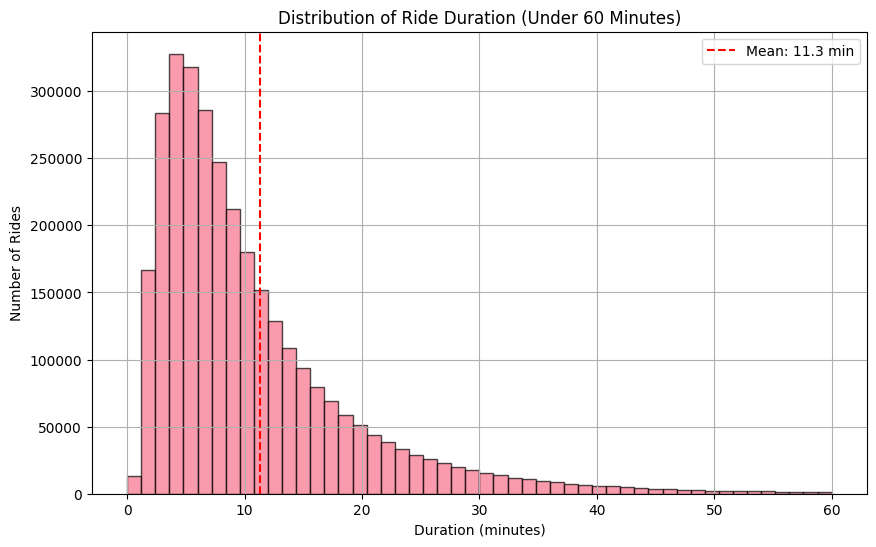

Mean duration: 11.28 minutes
Median duration: 8.07 minutes
Rides over 60 minutes: 18,586


In [26]:
# Calculate ride duration in minutes
df_clean['duration_minutes'] = (df_clean['ended_at'] - df_clean['started_at']).dt.total_seconds() / 60

plt.figure(figsize=(10, 6))
df_clean['duration_minutes'].hist(bins=50, range=(0, 60), edgecolor='black', alpha=0.7)
plt.title('Distribution of Ride Duration (Under 60 Minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Rides')

# Add some summary stats
mean_duration = df_clean['duration_minutes'].mean()
plt.axvline(mean_duration, color='red', linestyle='--', label=f'Mean: {mean_duration:.1f} min')
plt.legend()
plt.show()

# Print some summary statistics
print(f"Mean duration: {df_clean['duration_minutes'].mean():.2f} minutes")
print(f"Median duration: {df_clean['duration_minutes'].median():.2f} minutes")
print(f"Rides over 60 minutes: {(df_clean['duration_minutes'] > 60).sum():,}")

In [28]:
df_clean.to_parquet('../data/processed/cleaned_citibike_data_with_features.parquet')